In [ ]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/r7bthvstxw-2.zip

--2025-12-22 09:04:22--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/r7bthvstxw-2.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 3.5.71.77, 3.5.71.230, 3.5.70.82, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|3.5.71.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41450910 (40M) [application/zip]
Saving to: ‘r7bthvstxw-2.zip’

r7bthvstxw-2.zip    100%[===================>]  39.53M  11.0MB/s    in 3.6s    

2025-12-22 09:04:26 (11.0 MB/s) - ‘r7bthvstxw-2.zip’ saved [41450910/41450910]



In [ ]:
!unzip r7bthvstxw-2.zip  && mv r7bthvstxw-2 vehicle-type

Archive:  r7bthvstxw-2.zip
  inflating: r7bthvstxw-2/hatchback/PIC_157.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_141.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_166.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_163.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_161.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_112.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_18.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_25.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_2.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_42.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_100.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_38.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_74.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_154.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_22.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_101.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_149.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_36.jpg  
  inflating: r7bthvstxw-2/hatchback/PIC_49.jpg  
  inflating: r7bthvstxw-2/hatchba

In [ ]:
import torch

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
import torchvision.models as models
from torchvision import transforms

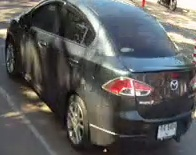

In [ ]:
img= Image.open('vehicle-type/sedan/PIC_0.jpg')
img

In [ ]:
X = np.array(img.resize((224, 224))) # all images in the dataset by default 244 * 244

In [ ]:
#Using pre-trained imagemnet model for training as the dataset is very small
model = models.mobilenet_v2(weights='IMAGENET1K_V1')
model.eval();

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 214MB/s]


In [ ]:
preprocess = transforms.Compose([
    #transforms.Resize(256),
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    #imagenet normalization
])

In [ ]:
x = preprocess(img)

batch_t = torch.unsqueeze(x, 0)

with torch.no_grad():
    output = model(batch_t)

_, indices = torch.sort(output, descending=True)

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt


--2025-12-22 09:04:37--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2025-12-22 09:04:37 (98.8 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Get top 5 predictions
top5_indices = indices[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 predictions:
1: minivan
2: sports car
3: racer
4: amphibian
5: bullet train


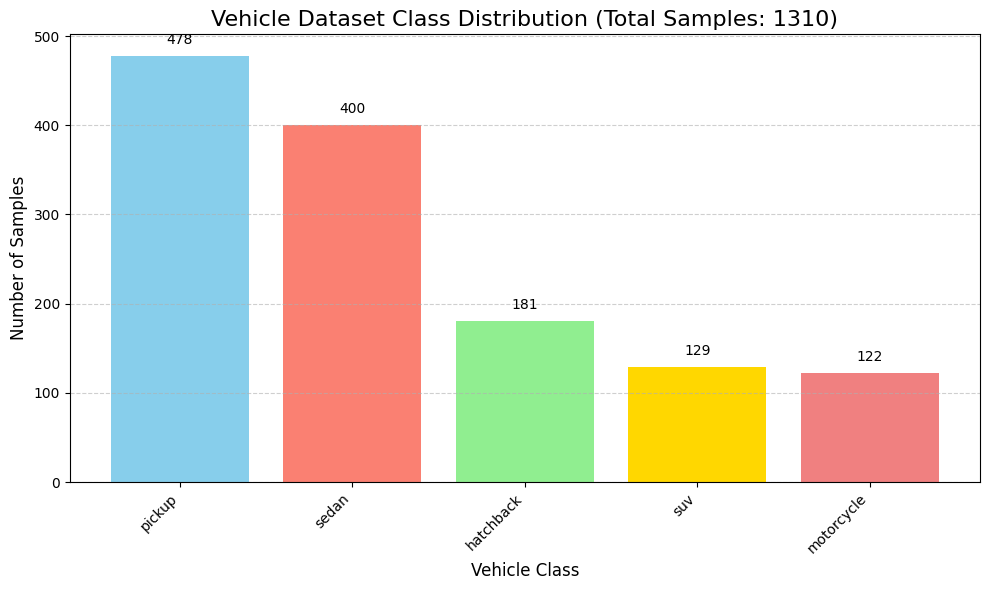

In [ ]:
import os
import matplotlib.pyplot as plt

# --- Configuration ---
# Set this to the path where your dataset folders (Sedan, Pickup, etc.) are located
DATA_DIR = './vehicle-type/'

# --- Data Collection ---
class_counts = {}
total_samples = 0

# Loop through all items in the main data directory
for class_name in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_name)

    # Check if the item is a directory (i.e., a class folder)
    if os.path.isdir(class_path):
        # Count the number of files (images) in that directory
        count = len(os.listdir(class_path))
        class_counts[class_name] = count
        total_samples += count

# --- Data Preparation for Plotting ---
class_names = list(class_counts.keys())
counts = list(class_counts.values())

# Sort the classes by their counts (optional, but helpful for visual clarity)
sorted_classes = sorted(class_counts.items(), key=lambda item: item[1], reverse=True)
class_names = [item[0] for item in sorted_classes]
counts = [item[1] for item in sorted_classes]

# --- Visualization (Bar Chart) ---
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, counts, color=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral'])

# Add labels and title
plt.title(f'Vehicle Dataset Class Distribution (Total Samples: {total_samples})', fontsize=16)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate class names for readability

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

# **IMBALANCE IN DATA**
## As per the above analysis, both the pickup and sedan class samples are high compared to other classes and there is an imbalance. In order to rectify this, we need to use **weighted cross-entropy loss function**

In [ ]:
import os
from torch.utils.data import Dataset
from PIL import Image

# Define a custom Dataset class for loading vehicle images
class VehicleDataset(Dataset):
    # Initialize the dataset
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir  # Root directory containing class folders
        self.transform = transform  # Transformations to apply to images (e.g., resizing, normalization)
        self.image_paths = []     # List to store full paths to all images
        self.labels = []          # List to store integer labels corresponding to each image

        # Get class names from subdirectories and sort them for consistent indexing
        self.classes = sorted(os.listdir(data_dir))
        # Create a mapping from class name (string) to integer index
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        # Populate image_paths and labels lists
        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)  # Path to the current class's directory
            # Iterate through all image files in the class directory
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))  # Add image path
                self.labels.append(self.class_to_idx[label_name])           # Add corresponding integer label

    # Return the total number of samples in the dataset
    def __len__(self):
        return len(self.image_paths)

    # Return a single sample (image and its label) given an index
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]  # Get the path of the image at the given index
        image = Image.open(img_path).convert('RGB')  # Open and convert image to RGB format
        label = self.labels[idx]          # Get the label for the image

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label

**HYPER-PARAMETER TUNING**

Let's try with multiple Learning rate to see which one is good.

In [ ]:
input_size = 224

# ImageNet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Simple transforms - just resize and normalize
train_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    #transforms.RandomRotation(10),           # Rotate up to 10 degrees
    #transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),  # Zoom
    #transforms.RandomHorizontalFlip(),       # Horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

# Path to your current unsplit folder
input_folder = 'vehicle-type'

# Split with a ratio: 80% Train, 10% Val, 10% Test
# Seed ensures the split is reproducible every time you run it
splitfolders.ratio(input_folder, output="vehicle_data_split",
                   seed=1337, ratio=(.8, .1, .1))

Copying files: 1310 files [00:00, 6788.15 files/s]


In [ ]:
from torch.utils.data import DataLoader

train_dataset = VehicleDataset(
    data_dir='./vehicle_data_split/train',
    transform=train_transforms
)

val_dataset = VehicleDataset(
    data_dir='./vehicle_data_split/val',
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.nn as nn

class VehicleClassifierModel(nn.Module):
    def __init__(self, num_classes=5):
        super(VehicleClassifierModel, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.output_layer = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.output_layer(x)
        return x

In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VehicleClassifierModel(num_classes=5)
model.to(device);

In [ ]:
import torch
import os

# Path to your main training directory
DATA_DIR = 'vehicle-type'

# Dynamically get counts from folders
class_names = sorted(os.listdir(DATA_DIR))
counts = [len(os.listdir(os.path.join(DATA_DIR, c))) for c in class_names]

total = sum(counts)
num_classes = len(counts)

# Calculate weights: Total / (num_classes * class_count)
weights = [total / (num_classes * c) for c in counts]

# Convert to a FloatTensor for PyTorch
class_weights = torch.FloatTensor(weights)

print(f"Classes: {class_names}")
print(f"Counts: {counts}")
print(f"Calculated Weights: {weights}")

Classes: ['hatchback', 'motorcycle', 'pickup', 'sedan', 'suv']
Counts: [181, 122, 478, 400, 129]
Calculated Weights: [1.4475138121546962, 2.1475409836065573, 0.5481171548117155, 0.655, 2.0310077519379846]


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

import torch.nn as nn

# 1. Define the loss function with your calculated weights
# If you are using a GPU, make sure the weights are on the same device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_weights = class_weights.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)



In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Iterate over the training data
    for inputs, labels in train_loader:
        # Move data to the specified device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients to prevent accumulation
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Calculate the loss
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()
        # Get predictions
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    # Disable gradient calculation for validation
    with torch.no_grad():
        # Iterate over the validation data
        for inputs, labels in val_loader:
            # Move data to the specified device (GPU or CPU)
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            outputs = model(inputs)
            # Calculate the loss
            loss = criterion(outputs, labels)

            # Accumulate validation loss
            val_loss += loss.item()
            # Get predictions
            _, predicted = torch.max(outputs.data, 1)
            # Update total and correct predictions
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_acc = val_correct / val_total

    # Print epoch results
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 1/10
  Train Loss: 1.8593, Train Acc: 0.4474
  Val Loss: 0.7743, Val Acc: 0.8062
Epoch 2/10
  Train Loss: 0.4622, Train Acc: 0.8260
  Val Loss: 0.3593, Val Acc: 0.8760
Epoch 3/10
  Train Loss: 0.3407, Train Acc: 0.8738
  Val Loss: 0.3269, Val Acc: 0.8140
Epoch 4/10
  Train Loss: 0.2911, Train Acc: 0.8815
  Val Loss: 0.3821, Val Acc: 0.8527
Epoch 5/10
  Train Loss: 0.3192, Train Acc: 0.8700
  Val Loss: 0.2499, Val Acc: 0.8605
Epoch 6/10
  Train Loss: 0.2725, Train Acc: 0.9034
  Val Loss: 0.3087, Val Acc: 0.8527
Epoch 7/10
  Train Loss: 0.2085, Train Acc: 0.9149
  Val Loss: 0.2819, Val Acc: 0.8527
Epoch 8/10
  Train Loss: 0.2790, Train Acc: 0.8881
  Val Loss: 0.8453, Val Acc: 0.7442
Epoch 9/10
  Train Loss: 0.2531, Train Acc: 0.8891
  Val Loss: 0.3017, Val Acc: 0.9147
Epoch 10/10
  Train Loss: 0.3400, Train Acc: 0.8910
  Val Loss: 0.5252, Val Acc: 0.7829


In [ ]:
def  train_and_val(model, optimizer, train_loader, val_loader, criterion, num_epochs, device) :
  # Training loop
  num_epochs =  10

  for epoch in range(num_epochs):
      # Training phase
      model.train()  # Set the model to training mode
      running_loss = 0.0
      correct = 0
      total = 0

      # Iterate over the training data
      for inputs, labels in train_loader:
          # Move data to the specified device (GPU or CPU)
          inputs, labels = inputs.to(device), labels.to(device)

          # Zero the parameter gradients to prevent accumulation
          optimizer.zero_grad()
          # Forward pass
          outputs = model(inputs)
          # Calculate the loss
          loss = criterion(outputs, labels)
          # Backward pass and optimize
          loss.backward()
          optimizer.step()

          # Accumulate training loss
          running_loss += loss.item()
          # Get predictions
          _, predicted = torch.max(outputs.data, 1)
          # Update total and correct predictions
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      # Calculate average training loss and accuracy
      train_loss = running_loss / len(train_loader)
      train_acc = correct / total

      # Validation phase
      model.eval()  # Set the model to evaluation mode
      val_loss = 0.0
      val_correct = 0
      val_total = 0

      # Disable gradient calculation for validation
      with torch.no_grad():
          # Iterate over the validation data
          for inputs, labels in val_loader:
              # Move data to the specified device (GPU or CPU)
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              outputs = model(inputs)
              # Calculate the loss
              loss = criterion(outputs, labels)

              # Accumulate validation loss
              val_loss += loss.item()
              # Get predictions
              _, predicted = torch.max(outputs.data, 1)
              # Update total and correct predictions
              val_total += labels.size(0)
              val_correct += (predicted == labels).sum().item()

      # Calculate average validation loss and accuracy
      val_loss /= len(val_loader)
      val_acc = val_correct / val_total

      # Print epoch results
      print(f'Epoch {epoch+1}/{num_epochs}')
      print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
      print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

In [ ]:
def make_model(learning_rate=0.01, class_weights=None):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VehicleClassifierModel(num_classes=5)
    model.to(device) # Move the model to the correct device
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # 1. Define the loss function with your calculated weights
    # If you are using a GPU, make sure the weights are on the same device
    if class_weights is not None:
      class_weights = class_weights.to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    return model, optimizer, criterion

In [ ]:
for lr in [0.001, 0.01, 0.1, 0.1]:
  print("learning rate =", lr)
  model, optimizer, criterion = make_model(learning_rate=lr, class_weights=class_weights)
  train_and_val(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

learning rate = 0.001
Epoch 1/10
  Train Loss: 1.2038, Train Acc: 0.5382
  Val Loss: 0.9562, Val Acc: 0.7674
Epoch 2/10
  Train Loss: 0.7443, Train Acc: 0.7820
  Val Loss: 0.7818, Val Acc: 0.7519
Epoch 3/10
  Train Loss: 0.6043, Train Acc: 0.8231
  Val Loss: 0.5801, Val Acc: 0.8140
Epoch 4/10
  Train Loss: 0.5196, Train Acc: 0.8423
  Val Loss: 0.6209, Val Acc: 0.8217
Epoch 5/10
  Train Loss: 0.4676, Train Acc: 0.8585
  Val Loss: 0.5584, Val Acc: 0.7674
Epoch 6/10
  Train Loss: 0.4293, Train Acc: 0.8738
  Val Loss: 0.4505, Val Acc: 0.8527
Epoch 7/10
  Train Loss: 0.3903, Train Acc: 0.8853
  Val Loss: 0.4603, Val Acc: 0.7597
Epoch 8/10
  Train Loss: 0.3529, Train Acc: 0.8987
  Val Loss: 0.4008, Val Acc: 0.8682
Epoch 9/10
  Train Loss: 0.3354, Train Acc: 0.8996
  Val Loss: 0.4026, Val Acc: 0.8372
Epoch 10/10
  Train Loss: 0.3080, Train Acc: 0.9130
  Val Loss: 0.3694, Val Acc: 0.8605
learning rate = 0.01
Epoch 1/10
  Train Loss: 1.9424, Train Acc: 0.4799
  Val Loss: 0.8617, Val Acc: 0.7519

Based on the hyper-parameter tuning, we could see the learning rate 0.01 is giving a very good accuracy amoung the tested learning rate.It gives **Train Acc: 0.9130 & Val Acc: 0.9380** . We can choose** 0.01** as our Learning rate for this model

Let's experiment with inner layer size.

In [ ]:
import torch.nn as nn

class VehicleClassifierModel(nn.Module):
    def __init__(self, num_classes=5,size_inner=100):
        super(VehicleClassifierModel, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))

        self.inner = nn.Linear(1280, size_inner)  # New inner layer
        self.relu = nn.ReLU()

        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [ ]:
def make_model(learning_rate=0.01, class_weights=None,size_inner=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VehicleClassifierModel(num_classes=5, size_inner=size_inner)
    model.to(device) # Move the model to the correct device
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # 1. Define the loss function with your calculated weights
    # If you are using a GPU, make sure the weights are on the same device
    if class_weights is not None:
      class_weights = class_weights.to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    return model, optimizer, criterion

In [ ]:
for size in [100,250,500,750,1000]:
  print("Inner layer size =", size)
  model, optimizer, criterion = make_model(size, class_weights=class_weights)
  train_and_val(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

Inner layer size = 100
Epoch 1/10
  Train Loss: 24722324.1699, Train Acc: 0.2075
  Val Loss: 35.4266, Val Acc: 0.0930
Epoch 2/10
  Train Loss: 4902.1927, Train Acc: 0.2151
  Val Loss: 25.4957, Val Acc: 0.0930
Epoch 3/10
  Train Loss: 27.9412, Train Acc: 0.1855
  Val Loss: 28.2842, Val Acc: 0.3643
Epoch 4/10
  Train Loss: 2124.7040, Train Acc: 0.1960
  Val Loss: 17.5210, Val Acc: 0.0930
Epoch 5/10
  Train Loss: 35.6926, Train Acc: 0.2008
  Val Loss: 52.4089, Val Acc: 0.1395
Epoch 6/10
  Train Loss: 40.2599, Train Acc: 0.1912
  Val Loss: 28.0231, Val Acc: 0.0930
Epoch 7/10
  Train Loss: 35.0727, Train Acc: 0.2122
  Val Loss: 43.1886, Val Acc: 0.3643
Epoch 8/10
  Train Loss: 38.6565, Train Acc: 0.2161
  Val Loss: 49.0287, Val Acc: 0.3643
Epoch 9/10
  Train Loss: 34.7292, Train Acc: 0.2333
  Val Loss: 32.6903, Val Acc: 0.0930
Epoch 10/10
  Train Loss: 30.7387, Train Acc: 0.2075
  Val Loss: 23.9536, Val Acc: 0.3101
Inner layer size = 250
Epoch 1/10
  Train Loss: 128460590.2306, Train Acc: 0

Looks like adding an inner layer is not improving the model. lets stick with only output layer.

Now, lets experiment with dropout

In [ ]:
import torch.nn as nn

class VehicleClassifierModel(nn.Module):
    def __init__(self, num_classes=5,dropout_p=0.0):
        super(VehicleClassifierModel, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))

        # dropout layer
        self.dropout = nn.Dropout(p=dropout_p)

        self.output_layer = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        # removed the previously added inner layer
        # added dropout layer
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

In [ ]:
def  train_and_val(model, optimizer, train_loader, val_loader, criterion, num_epochs, device) :
  best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy

  for epoch in range(num_epochs):
      # Training phase
      model.train()  # Set the model to training mode
      running_loss = 0.0
      correct = 0
      total = 0

      # Iterate over the training data
      for inputs, labels in train_loader:
          # Move data to the specified device (GPU or CPU)
          inputs, labels = inputs.to(device), labels.to(device)

          # Zero the parameter gradients to prevent accumulation
          optimizer.zero_grad()
          # Forward pass
          outputs = model(inputs)
          # Calculate the loss
          loss = criterion(outputs, labels)
          # Backward pass and optimize
          loss.backward()
          optimizer.step()

          # Accumulate training loss
          running_loss += loss.item()
          # Get predictions
          _, predicted = torch.max(outputs.data, 1)
          # Update total and correct predictions
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      # Calculate average training loss and accuracy
      train_loss = running_loss / len(train_loader)
      train_acc = correct / total

      # Validation phase
      model.eval()  # Set the model to evaluation mode
      val_loss = 0.0
      val_correct = 0
      val_total = 0

      # Disable gradient calculation for validation
      with torch.no_grad():
          # Iterate over the validation data
          for inputs, labels in val_loader:
              # Move data to the specified device (GPU or CPU)
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              outputs = model(inputs)
              # Calculate the loss
              loss = criterion(outputs, labels)

              # Accumulate validation loss
              val_loss += loss.item()
              # Get predictions
              _, predicted = torch.max(outputs.data, 1)
              # Update total and correct predictions
              val_total += labels.size(0)
              val_correct += (predicted == labels).sum().item()

      # Calculate average validation loss and accuracy
      val_loss /= len(val_loader)
      val_acc = val_correct / val_total

      # Print epoch results
      print(f'Epoch {epoch+1}/{num_epochs}')
      print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
      print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

      if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'vehicleclassifier_WDO_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

In [ ]:
def make_model(learning_rate=0.01, class_weights=None,dropout_p=0.0):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VehicleClassifierModel(num_classes=5,dropout_p=dropout_p)
    model.to(device) # Move the model to the correct device
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # 1. Define the loss function with your calculated weights
    # If you are using a GPU, make sure the weights are on the same device
    if class_weights is not None:
      class_weights = class_weights.to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    return model, optimizer, criterion

In [ ]:
num_epoch=50
for drop_out in [0.2,0.4,0.5,0.7]:
  print("Dropout =", drop_out)
  model, optimizer, criterion = make_model(dropout_p=drop_out,class_weights=class_weights)

  train_and_val(model, optimizer, train_loader, val_loader, criterion, num_epoch, device)

Dropout = 0.2
Epoch 1/50
  Train Loss: 1.3676, Train Acc: 0.5382
  Val Loss: 0.6529, Val Acc: 0.8605
Checkpoint saved: vehicleclassifier_WDO_01_0.860.pth
Epoch 2/50
  Train Loss: 0.6426, Train Acc: 0.7600
  Val Loss: 0.4123, Val Acc: 0.8450
Epoch 3/50
  Train Loss: 0.4892, Train Acc: 0.8298
  Val Loss: 0.5515, Val Acc: 0.7907
Epoch 4/50
  Train Loss: 0.4920, Train Acc: 0.8356
  Val Loss: 0.3107, Val Acc: 0.8372
Epoch 5/50
  Train Loss: 0.3721, Train Acc: 0.8509
  Val Loss: 0.3054, Val Acc: 0.8605
Epoch 6/50
  Train Loss: 0.3489, Train Acc: 0.8470
  Val Loss: 0.2655, Val Acc: 0.8837
Checkpoint saved: vehicleclassifier_WDO_06_0.884.pth
Epoch 7/50
  Train Loss: 0.3565, Train Acc: 0.8623
  Val Loss: 0.2801, Val Acc: 0.8915
Checkpoint saved: vehicleclassifier_WDO_07_0.891.pth
Epoch 8/50
  Train Loss: 0.2591, Train Acc: 0.8910
  Val Loss: 0.2879, Val Acc: 0.9070
Checkpoint saved: vehicleclassifier_WDO_08_0.907.pth
Epoch 9/50
  Train Loss: 0.2109, Train Acc: 0.9140
  Val Loss: 0.3200, Val Acc

Based on the experimentation
dropout: 0.2

Epoch 30/50
  Train Loss: 0.2178, Train Acc: 0.9283
  Val Loss: 0.4486, Val Acc: 0.9225
Checkpoint saved: vehicleclassifier_WDO_30_0.922.pth

Epoch 8/50
  Train Loss: 0.2591, Train Acc: 0.8910
  Val Loss: 0.2879, Val Acc: 0.9070

In [48]:
import os
from torch.utils.data import Dataset
from PIL import Image

# Define a custom Dataset class for loading vehicle images
class VehicleDataset(Dataset):
    # Initialize the dataset
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir  # Root directory containing class folders
        self.transform = transform  # Transformations to apply to images (e.g., resizing, normalization)
        self.image_paths = []     # List to store full paths to all images
        self.labels = []          # List to store integer labels corresponding to each image

        # Get class names from subdirectories and sort them for consistent indexing
        self.classes = sorted(os.listdir(data_dir))
        # Create a mapping from class name (string) to integer index
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        # Populate image_paths and labels lists
        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)  # Path to the current class's directory
            # Iterate through all image files in the class directory
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))  # Add image path
                self.labels.append(self.class_to_idx[label_name])           # Add corresponding integer label

    # Return the total number of samples in the dataset
    def __len__(self):
        return len(self.image_paths)

    # Return a single sample (image and its label) given an index
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]  # Get the path of the image at the given index
        image = Image.open(img_path).convert('RGB')  # Open and convert image to RGB format
        label = self.labels[idx]          # Get the label for the image

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label

In [49]:
import torch.nn as nn

class VehicleClassifierModel(nn.Module):
    def __init__(self, num_classes=5,dropout_p=0.0):
        super(VehicleClassifierModel, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))

        # dropout layer
        self.dropout = nn.Dropout(p=dropout_p)

        self.output_layer = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        # removed the previously added inner layer
        # added dropout layer
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

In [57]:
def  train_and_val(model, optimizer, train_loader, val_loader, criterion, num_epochs, device) :
  best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy

  for epoch in range(num_epochs):
      # Training phase
      model.train()  # Set the model to training mode
      running_loss = 0.0
      correct = 0
      total = 0

      # Iterate over the training data
      for inputs, labels in train_loader:
          # Move data to the specified device (GPU or CPU)
          inputs, labels = inputs.to(device), labels.to(device)

          # Zero the parameter gradients to prevent accumulation
          optimizer.zero_grad()
          # Forward pass
          outputs = model(inputs)
          # Calculate the loss
          loss = criterion(outputs, labels)
          # Backward pass and optimize
          loss.backward()
          optimizer.step()

          # Accumulate training loss
          running_loss += loss.item()
          # Get predictions
          _, predicted = torch.max(outputs.data, 1)
          # Update total and correct predictions
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      # Calculate average training loss and accuracy
      train_loss = running_loss / len(train_loader)
      train_acc = correct / total

      # Validation phase
      model.eval()  # Set the model to evaluation mode
      val_loss = 0.0
      val_correct = 0
      val_total = 0

      # Disable gradient calculation for validation
      with torch.no_grad():
          # Iterate over the validation data
          for inputs, labels in val_loader:
              # Move data to the specified device (GPU or CPU)
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              outputs = model(inputs)
              # Calculate the loss
              loss = criterion(outputs, labels)

              # Accumulate validation loss
              val_loss += loss.item()
              # Get predictions
              _, predicted = torch.max(outputs.data, 1)
              # Update total and correct predictions
              val_total += labels.size(0)
              val_correct += (predicted == labels).sum().item()

      # Calculate average validation loss and accuracy
      val_loss /= len(val_loader)
      val_acc = val_correct / val_total

      # Print epoch results
      print(f'Epoch {epoch+1}/{num_epochs}')
      print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
      print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

      if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'vehicleclassifier_WDA_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

In [58]:
def make_model(learning_rate=0.01, class_weights=None,dropout_p=0.0):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VehicleClassifierModel(num_classes=5,dropout_p=dropout_p)
    model.to(device) # Move the model to the correct device
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # 1. Define the loss function with your calculated weights
    # If you are using a GPU, make sure the weights are on the same device
    if class_weights is not None:
      class_weights = class_weights.to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    return model, optimizer, criterion

**Transform	to be applied:**

1.RandomHorizontalFlip	Effectively doubles your dataset size. A "Left-facing  Sedan" and a "Right-facing Sedan" are identical to the model's logic.

2.ColorJitter	Crucial for surveillance/outdoor data. It prevents the model from associating a specific car color with a class (e.g., "all SUVs are black").

3.RandomResizedCrop	Helps the model recognize a "Pickup" even if only the front half is visible or if the car is far away in the frame.

4.RandomRotation	Useful for security camera feeds which are often mounted at high, angled positions.

In [59]:
input_size = 224

# ImageNet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [60]:


train_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),

    # 1. Horizontal Flip: A car is still a car if viewed from the other side.
    transforms.RandomHorizontalFlip(p=0.5),

    # 2. Random Rotation: Handles cars parked at slight angles or tilted cameras.
    transforms.RandomRotation(15),

    # 3. Color Jitter: Simulates different lighting (sunny vs. cloudy) and car colors.
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),

    # 4. Random Resized Crop: Simulates the car being closer or further from the camera.
    transforms.RandomResizedCrop(input_size, scale=(0.8, 1.0)),

    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [61]:
from torch.utils.data import DataLoader

train_dataset = VehicleDataset(
    data_dir='./vehicle_data_split/train',
    transform=train_transforms
)

val_dataset = VehicleDataset(
    data_dir='./vehicle_data_split/val',
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [62]:
learning_rate = 0.01
dropout = 0.02
epochs = 50
#No inner layer needed

In [63]:
model, optimizer, criterion = make_model(learning_rate=learning_rate,dropout_p=dropout,class_weights=class_weights)
train_and_val(model, optimizer, train_loader, val_loader, criterion, epochs, device)

Epoch 1/50
  Train Loss: 2.2548, Train Acc: 0.4264
  Val Loss: 1.2623, Val Acc: 0.7519
Checkpoint saved: vehicleclassifier_WDA_01_0.752.pth
Epoch 2/50
  Train Loss: 0.7068, Train Acc: 0.7113
  Val Loss: 0.6336, Val Acc: 0.7054
Epoch 3/50
  Train Loss: 0.7105, Train Acc: 0.7189
  Val Loss: 0.5623, Val Acc: 0.7364
Epoch 4/50
  Train Loss: 0.5531, Train Acc: 0.7572
  Val Loss: 0.3889, Val Acc: 0.8605
Checkpoint saved: vehicleclassifier_WDA_04_0.860.pth
Epoch 5/50
  Train Loss: 0.6103, Train Acc: 0.7667
  Val Loss: 0.4533, Val Acc: 0.7752
Epoch 6/50
  Train Loss: 0.7545, Train Acc: 0.7208
  Val Loss: 0.4779, Val Acc: 0.7907
Epoch 7/50
  Train Loss: 0.6251, Train Acc: 0.7849
  Val Loss: 0.5280, Val Acc: 0.7442
Epoch 8/50
  Train Loss: 0.4951, Train Acc: 0.8050
  Val Loss: 0.4016, Val Acc: 0.8217
Epoch 9/50
  Train Loss: 0.5405, Train Acc: 0.7973
  Val Loss: 0.6447, Val Acc: 0.6977
Epoch 10/50
  Train Loss: 0.5270, Train Acc: 0.7935
  Val Loss: 0.6170, Val Acc: 0.7442
Epoch 11/50
  Train Los

While the non-augmented model showed a higher peak accuracy (92%), the model trained with Data Augmentation demonstrated superior generalization and a lower cross-entropy loss (89% with less Validation loss), making it the more reliable choice for practical vehicle classification.
Hence, we will use the model with Data augmentation having 89% accuracy

Final Model: vehicleclassifier_WDA_32_0.899.pth

Let's delete all the other models and convert this model to onnx for inference and serving.

In [64]:
!pip install torchsummary
from torchsummary import summary

summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [65]:
model_file = "/content/vehicleclassifier_WDA_32_0.899.pth"

In [66]:
model = VehicleClassifierModel(num_classes=5,dropout_p=0.2)
model.load_state_dict(torch.load(model_file))
model.to(device)
model.eval()

VehicleClassifierModel(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, 

Test images for thailand vehices:
img1: https://www.shutterstock.com/shutterstock/photos/2670301995/display_1500/stock-photo-kamphaeng-phet-thailand-august-the-ranger-double-cab-sport-l-turbo-at-2670301995.jpg

img2 :https://www.shutterstock.com/shutterstock/photos/2615949409/display_1500/stock-photo-bangkok-thailand-apr-tesla-model-electric-car-red-color-2615949409.jpg

img3: https://www.shutterstock.com/shutterstock/photos/2143689667/display_1500/stock-photo-paris-france-january-bmw-m-i-xdrive-blue-car-isolated-on-white-background-d-2143689667.jpg

In [116]:
!wget --user-agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36" https://www.shutterstock.com/shutterstock/photos/2143689667/display_1500/stock-photo-paris-france-january-bmw-m-i-xdrive-blue-car-isolated-on-white-background-d-2143689667.jpg

--2025-12-22 12:36:48--  https://www.shutterstock.com/shutterstock/photos/2143689667/display_1500/stock-photo-paris-france-january-bmw-m-i-xdrive-blue-car-isolated-on-white-background-d-2143689667.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 65.8.76.24, 65.8.76.57, 65.8.76.85, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|65.8.76.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180253 (176K) [image/jpeg]
Saving to: ‘stock-photo-paris-france-january-bmw-m-i-xdrive-blue-car-isolated-on-white-background-d-2143689667.jpg’

stock-photo-paris-f 100%[===================>] 176.03K   282KB/s    in 0.6s    

2025-12-22 12:36:50 (282 KB/s) - ‘stock-photo-paris-france-january-bmw-m-i-xdrive-blue-car-isolated-on-white-background-d-2143689667.jpg’ saved [180253/180253]



In [117]:
test_img= "/content/stock-photo-paris-france-january-bmw-m-i-xdrive-blue-car-isolated-on-white-background-d-2143689667.jpg"

In [118]:
x = val_transforms(Image.open(test_img))
batch_t = torch.unsqueeze(x, 0).to(device)

with torch.no_grad():
    output = model(batch_t)

In [113]:
classes = ['hatchback', 'motorcycle', 'pickup', 'sedan', 'suv']

In [119]:
dict(zip(classes, output[0].to('cpu')))

{'hatchback': tensor(7.8249),
 'motorcycle': tensor(-7.6293),
 'pickup': tensor(3.0024),
 'sedan': tensor(2.9588),
 'suv': tensor(3.8775)}

In [122]:
!pip install onnx
! pip install onnxscript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.4/693.4 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 15.2 MB/s eta 0:00:00


In [123]:
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Export to ONNX
onnx_path = "vehicle_identifier_mobilenet_v2.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    verbose=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)

/tmp/ipython-input-3348169609.py:6: UserWarning: # 'dynamic_axes' is not recommended when dynamo=True, and may lead to 'torch._dynamo.exc.UserError: Constraints violated.' Supply the 'dynamic_shapes' argument instead if export is unsuccessful.
  torch.onnx.export(


[torch.onnx] Obtain model graph for `VehicleClassifierModel([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `VehicleClassifierModel([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 105 of general pattern rewrite rules.


ONNXProgram(
    model=
        <
            ir_version=10,
            opset_imports={'': 20},
            producer_name='pytorch',
            producer_version='2.9.0+cu126',
            domain=None,
            model_version=None,
        >
        graph(
            name=main_graph,
            inputs=(
                %"input"<FLOAT,[s77,3,224,224]>
            ),
            outputs=(
                %"output"<FLOAT,[s77,5]>
            ),
            initializers=(
                %"base_model.features.0.0.weight"<FLOAT,[32,3,3,3]>{Tensor(...)},
                %"base_model.features.1.conv.0.0.weight"<FLOAT,[32,1,3,3]>{Tensor(...)},
                %"base_model.features.1.conv.1.weight"<FLOAT,[16,32,1,1]>{Tensor(...)},
                %"base_model.features.2.conv.0.0.weight"<FLOAT,[96,16,1,1]>{Tensor(...)},
                %"base_model.features.2.conv.1.0.weight"<FLOAT,[96,1,3,3]>{Tensor(...)},
                %"base_model.features.2.conv.2.weight"<FLOAT,[24,96,1,1]>{Tensor(...